# Релаксационные колебания

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm


from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif' 

In [9]:
# функция мнк

def lsf(x, y, functional=True):
    x_avg = np.average(x)
    y_avg = np.average(y)
    xy_avg = np.average(x * y)
    x2_avg = np.average(np.square(x))
    y2_avg = np.average(np.square(y))
    count = len(x)
    
    print('x=', x_avg, 'y=', y_avg)
    print('x2=', x2_avg, 'y2=', y2_avg, 'xy=', xy_avg)
    
    b = (xy_avg - x_avg * y_avg) / (x2_avg - x_avg ** 2)
    b_error = ((y2_avg - y_avg ** 2)/(x2_avg - x_avg ** 2) - b ** 2) ** 0.5 / count ** 0.5
    a = y_avg - b * x_avg
    a_error = b_error * (x2_avg - x_avg ** 2) ** 0.5
    
    if functional:
        f = lambda x: b * x + a
        return f, (b, a, b_error, a_error)
    
    return b, a, b_error, a_error

In [90]:
rcParams['figure.figsize'] = (8, 5.2)
rcParams['figure.dpi'] = 300
rcParams['axes.grid'] = True
rcParams['font.size'] = 14
# rcParams

In [91]:
V_1 = 96 # В
I_1 = 4.2 # мА
V_2 = 76 # В
I_2 = 0.6 # мА
V_up = np.array([88.8, 96.5, 105.6, 107.5, 115.2])
I_up = np.array([2.9, 4.2, 5.9, 6.3, 7.7])
V_dw = np.array([110.2, 100.4, 95.7, 90.8, 88.8, 84.2, 82.9, 78.9, 76.8])
I_dw = np.array([6.8, 5.1, 4.2, 3.3, 2.9, 2.1, 1.9, 1.1, 0.8])
V_ = np.array([100.4])
I_ = np.array([5.1])

x= 3.942857142857142 y= 94.45
x2= 19.921428571428574 y2= 9055.329285714286 xy= 396.6578571428571


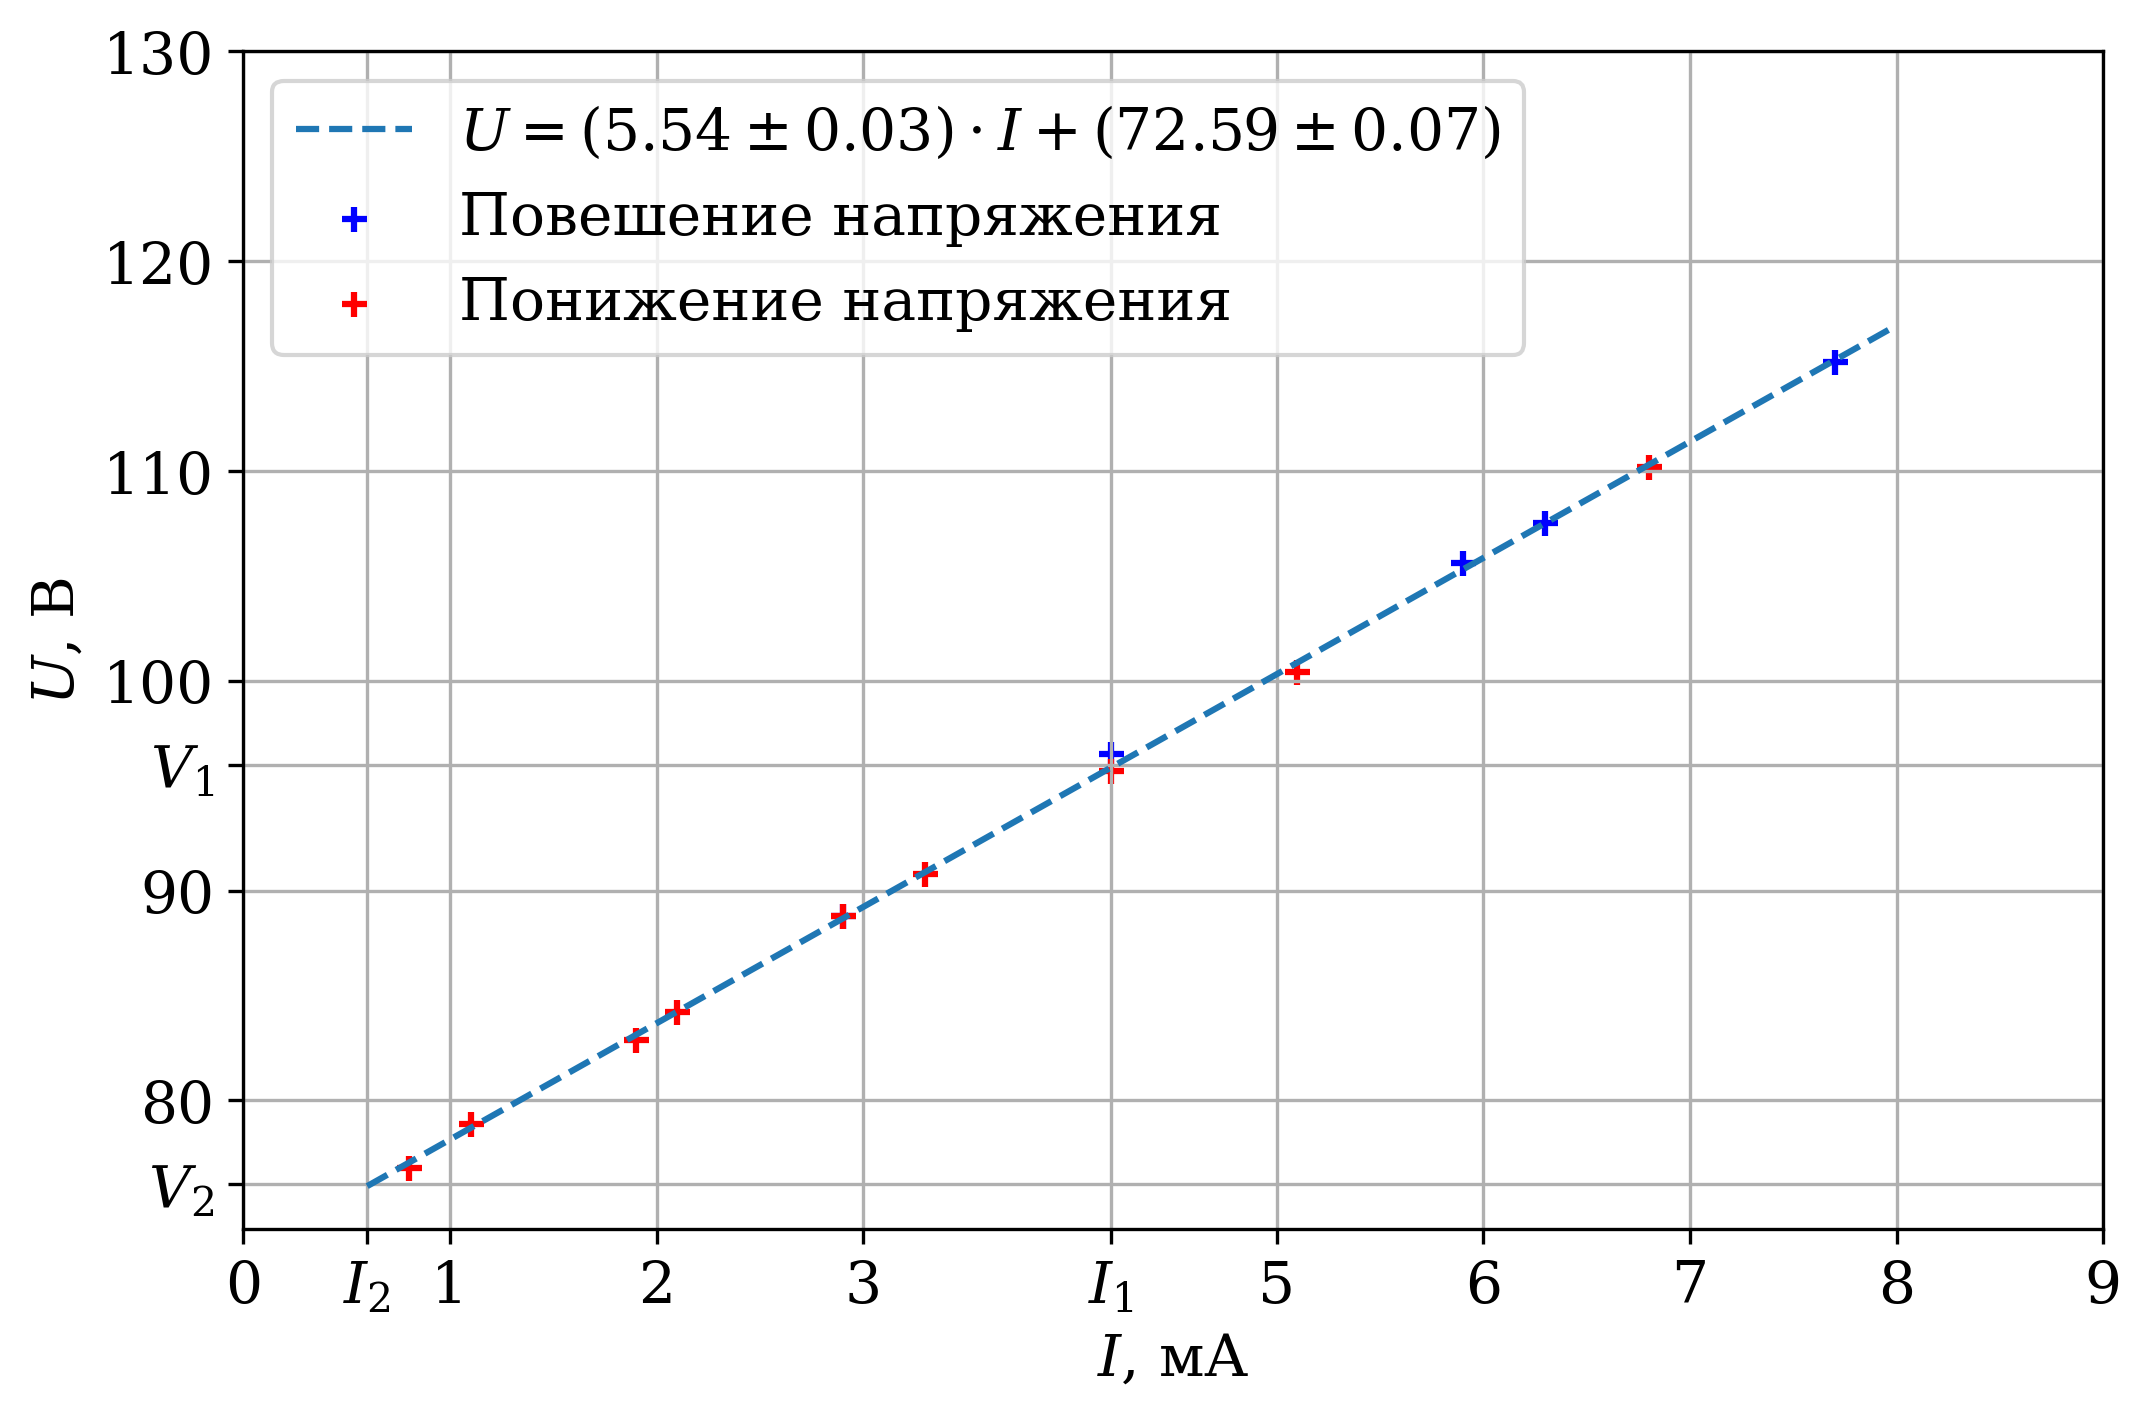

In [92]:
plt.scatter(I_up, V_up, marker="+", c="blue", label="Повешение напряжения")
plt.scatter(I_dw, V_dw, marker="+", c="red", label="Понижение напряжения")
# plt.scatter(I_, V_, marker="+", c="orange", label="Исключено из расчётов")

f, args = lsf(np.append(I_up, I_dw), np.append(V_up, V_dw))
x = np.linspace(I_2, 8, 10)

plt.plot(x, f(x), ls='--', label="$U = ({:.2f} \pm {:.2f} ) \cdot I + ({:.2f} \pm {:.2f})$".format(args[0], args[2], args[1], args[3]))
plt.xticks([0, 1, 2, 3, 5, 6, 7, 8, 9] + [I_2] + [I_1], [0, 1, 2, 3, 5, 6, 7, 8, 9] + ["$I_2$"] + ["$I_1$"])
plt.xlim([0, 9])
plt.yticks([80, 90, 100, 110, 120, 130] + [V_2] + [V_1], [80, 90, 100, 110, 120, 130] + ["$V_2$"] + ["$V_1$"])

plt.xlabel("$I$, мА")
plt.ylabel("$U$, В")

plt.legend()
plt.savefig("plot1.png")

x= 3.942857142857142 y= 73.15857142857143
x2= 19.921428571428574 y2= 5352.333285714286 xy= 289.08214285714286


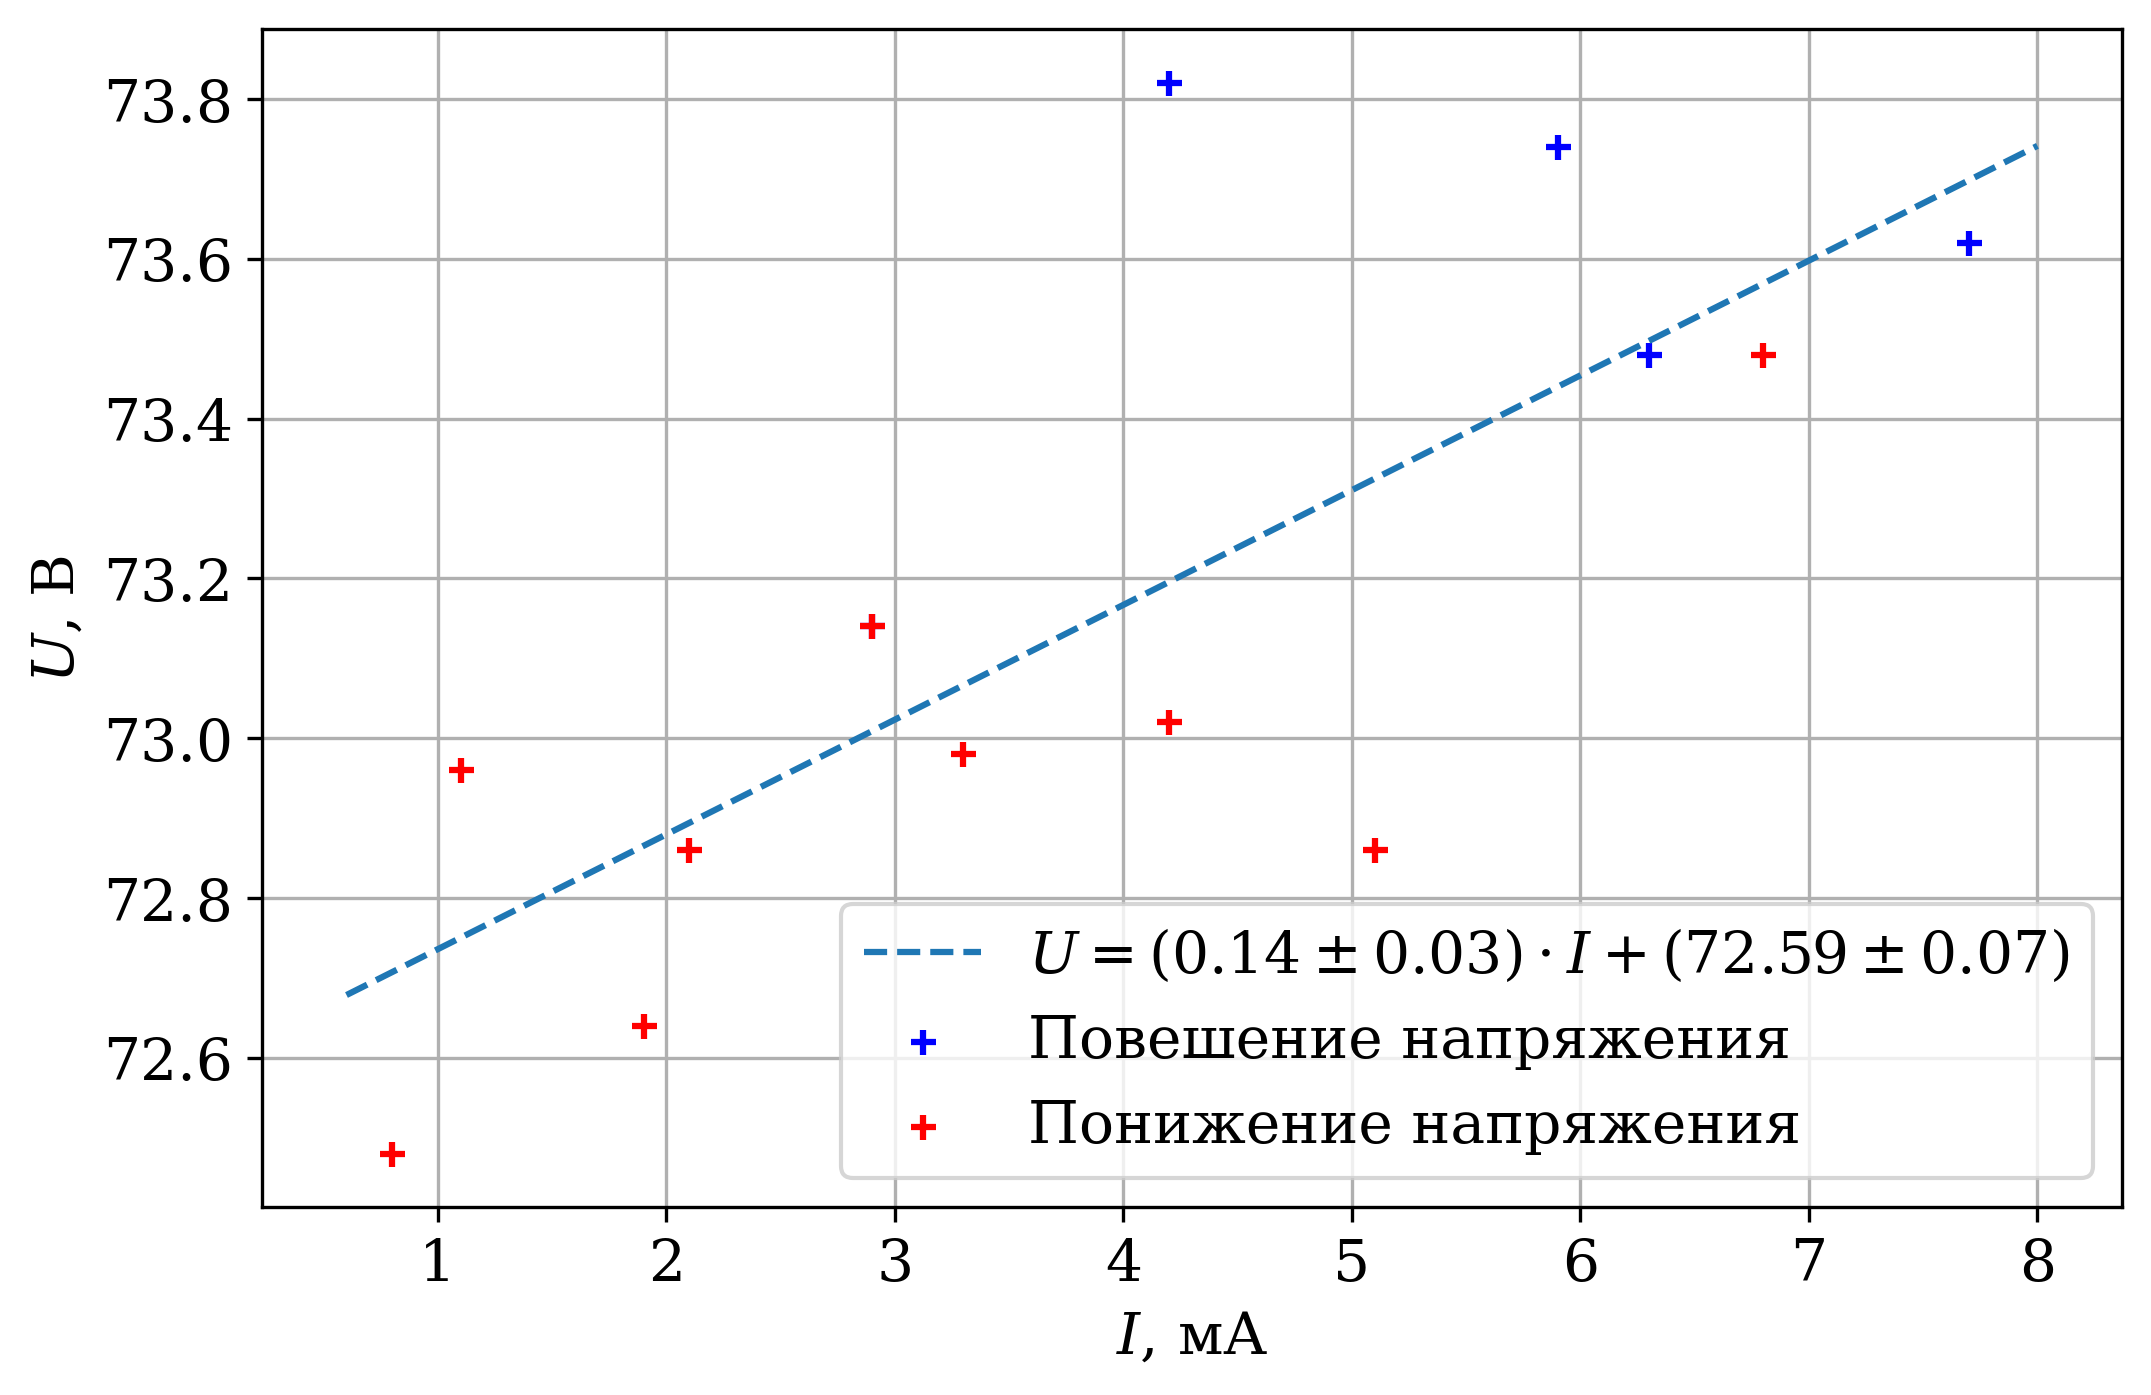

In [103]:
r = 5.4

plt.scatter(I_up, V_up - r * I_up, marker="+", c="blue", label="Повешение напряжения")
plt.scatter(I_dw, V_dw - r * I_dw, marker="+", c="red", label="Понижение напряжения")
# plt.scatter(I_, V_, marker="+", c="orange", label="Исключено из расчётов")

f, args = lsf(np.append(I_up, I_dw), np.append(V_up  - r * I_up, V_dw - r * I_dw))
x = np.linspace(I_2, 8, 10)

plt.plot(x, f(x), ls='--', label="$U = ({:.2f} \pm {:.2f} ) \cdot I + ({:.2f} \pm {:.2f})$".format(args[0], args[2], args[1], args[3]))
# plt.xticks([0, 1, 2, 3, 5, 6, 7, 8, 9] + [I_2] + [I_1], [0, 1, 2, 3, 5, 6, 7, 8, 9] + ["$I_2$"] + ["$I_1$"])
# plt.xlim([0, 9])
# plt.yticks([80, 90, 100, 110, 120, 130] + [V_2] + [V_1], [80, 90, 100, 110, 120, 130] + ["$V_2$"] + ["$V_1$"])

plt.xlabel("$I$, мА")
plt.ylabel("$U$, В")

plt.legend()
plt.savefig("plot2.png")

In [146]:
# R = 600 kOm

C_R = np.array([5, 4, 3, 2, 1.5, 1, 0.8, 0.5]) * 0.01 # mkF
f_R = np.array([39.6, 45.8, 60.4, 90.2, 119, 180, 226, 363]) # Hz
T_R = 1/f_R

# C = 5e-2 mkF

R_C = np.array([900, 800, 700, 600, 500, 400, 300, 200, 130]) # kOm
f_C = np.array([25.1, 28.7, 32.8, 38.2, 46.1, 57.4, 75.4, 106.3, 147])
T_C = 1/f_C

def T_teor (R, C, U, V_p):
    return 0.001 * R * C * np.log((U - V_p)/(U - V_1))

print(*["{:.1f}".format(i) for i in T_C * 1000], sep=' & ', end=' \\')

39.8 & 34.8 & 30.5 & 26.2 & 21.7 & 17.4 & 13.3 & 9.4 & 6.8 \

array([[0.02893422]])

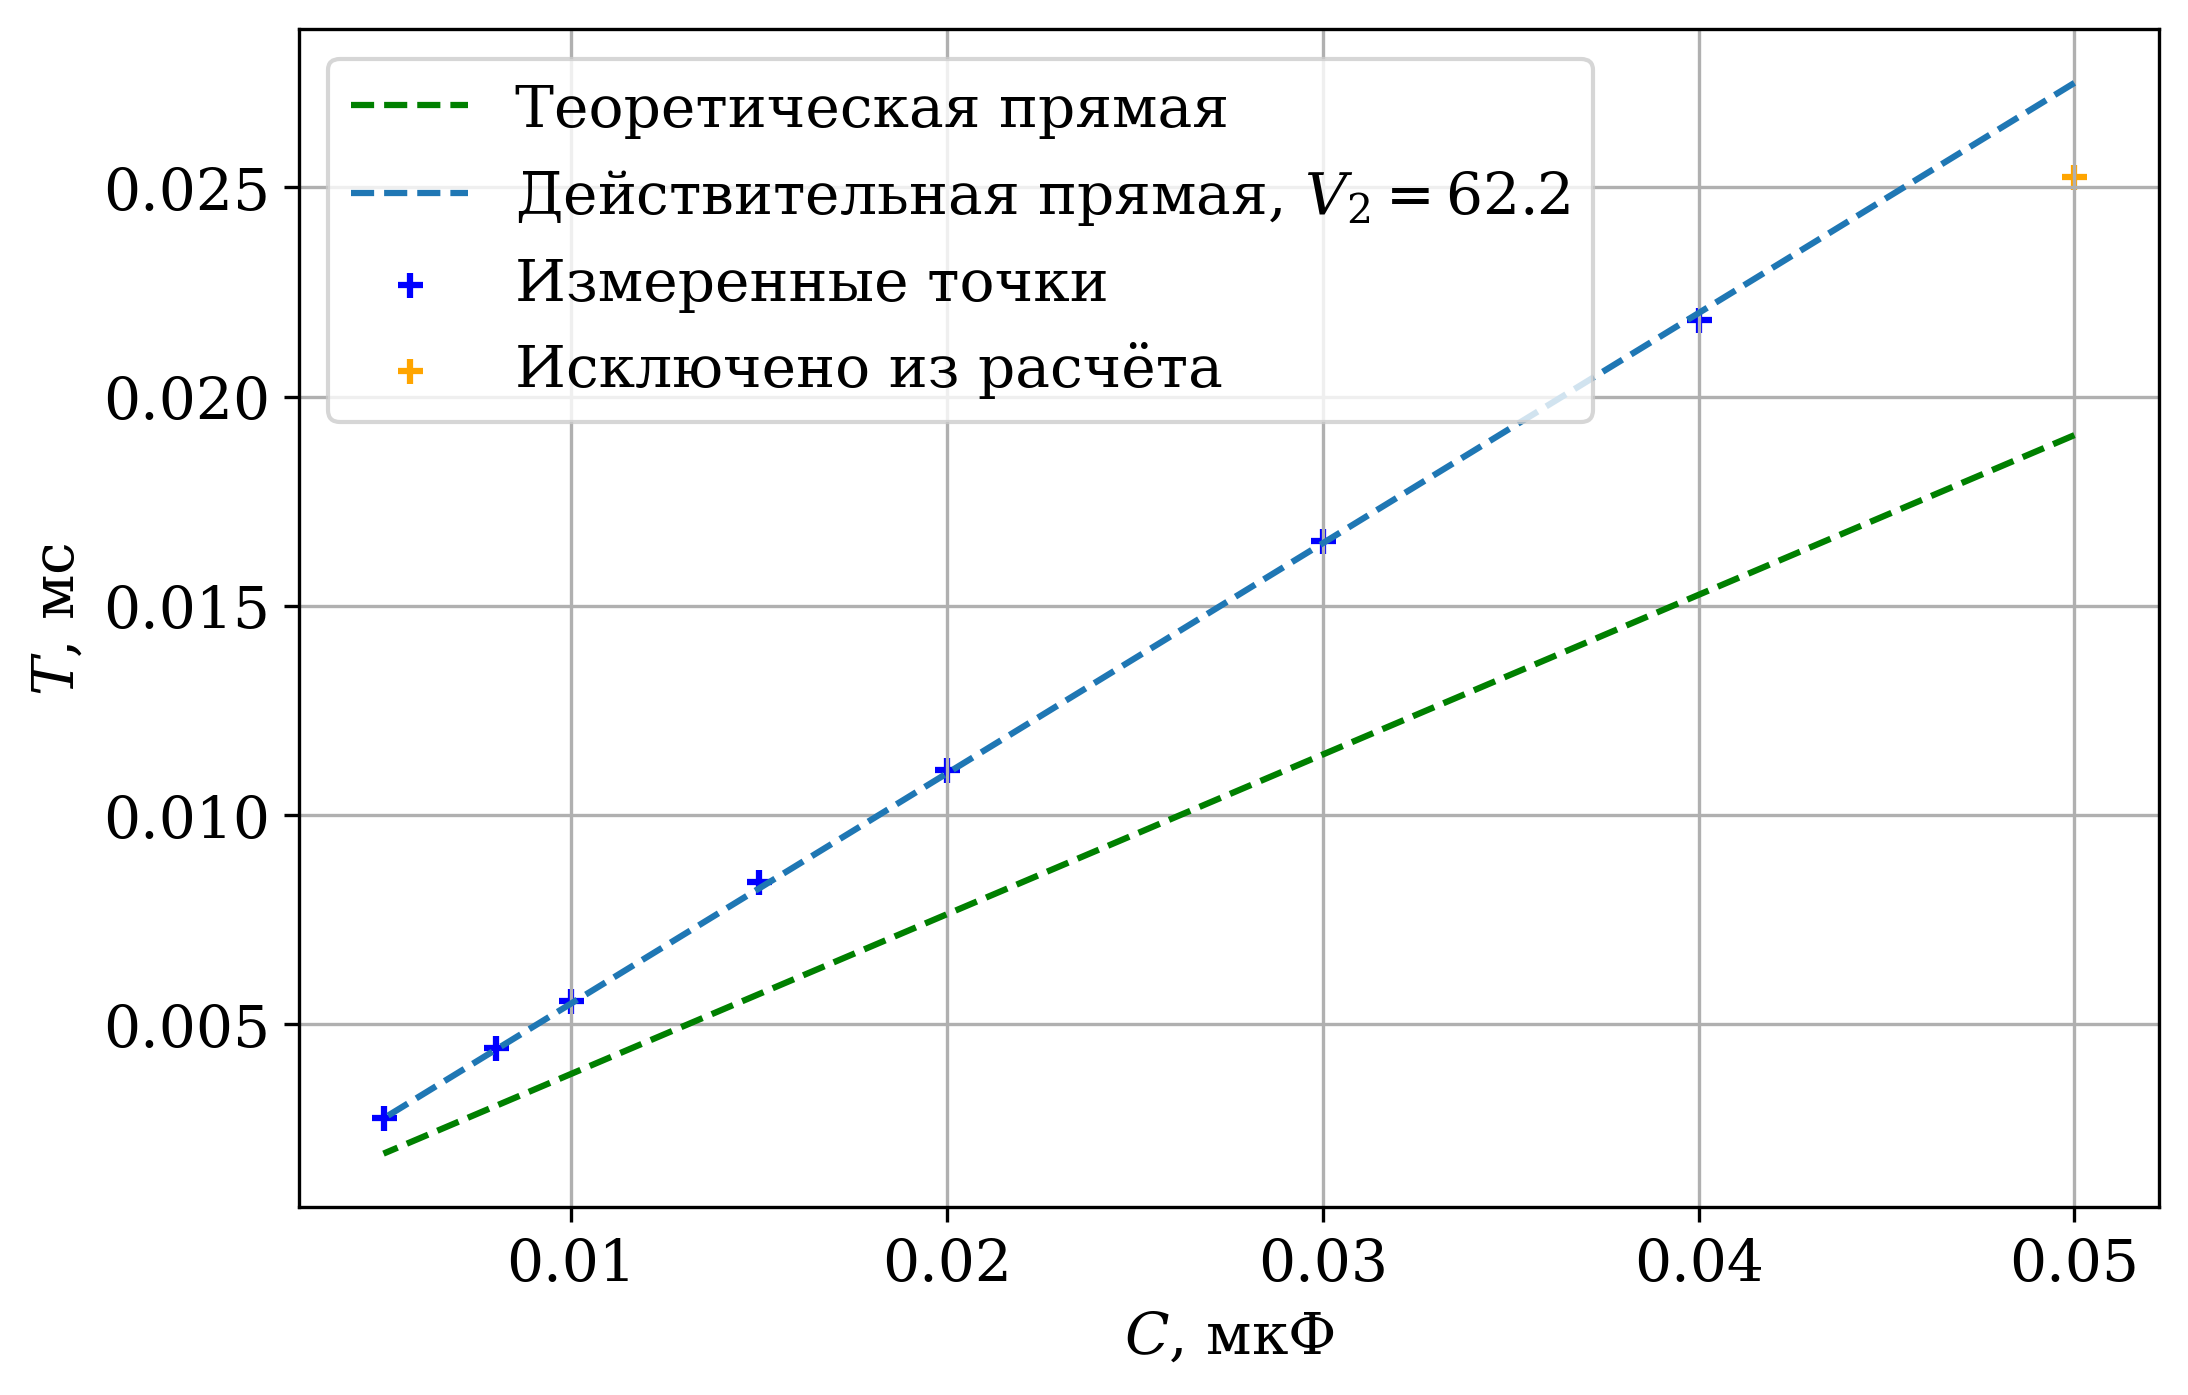

In [160]:
a, b = curve_fit(lambda x, y: T_teor(600, x, 118.5, y), C_R[1:], T_R[1:])


plt.scatter(C_R[1:], T_R[1:], marker='+', color="blue", label="Измеренные точки")
plt.scatter(C_R[0], T_R[0], marker='+', color="orange", label="Исключено из расчёта")
plt.plot(C_R, T_teor(600, C_R, 118.5, V_2), color="green", ls='--', label="Теоретическая прямая")
plt.plot(C_R, T_teor(600, C_R, 118.5, a[0]), ls='--', label="Действительная прямая, $V_2 = {:.1f}$".format(a[0]))

plt.xlabel("$C$, мкФ")
plt.ylabel("$T$, мс")
plt.legend()

plt.savefig("plot3.png")
b

array([[0.10027449]])

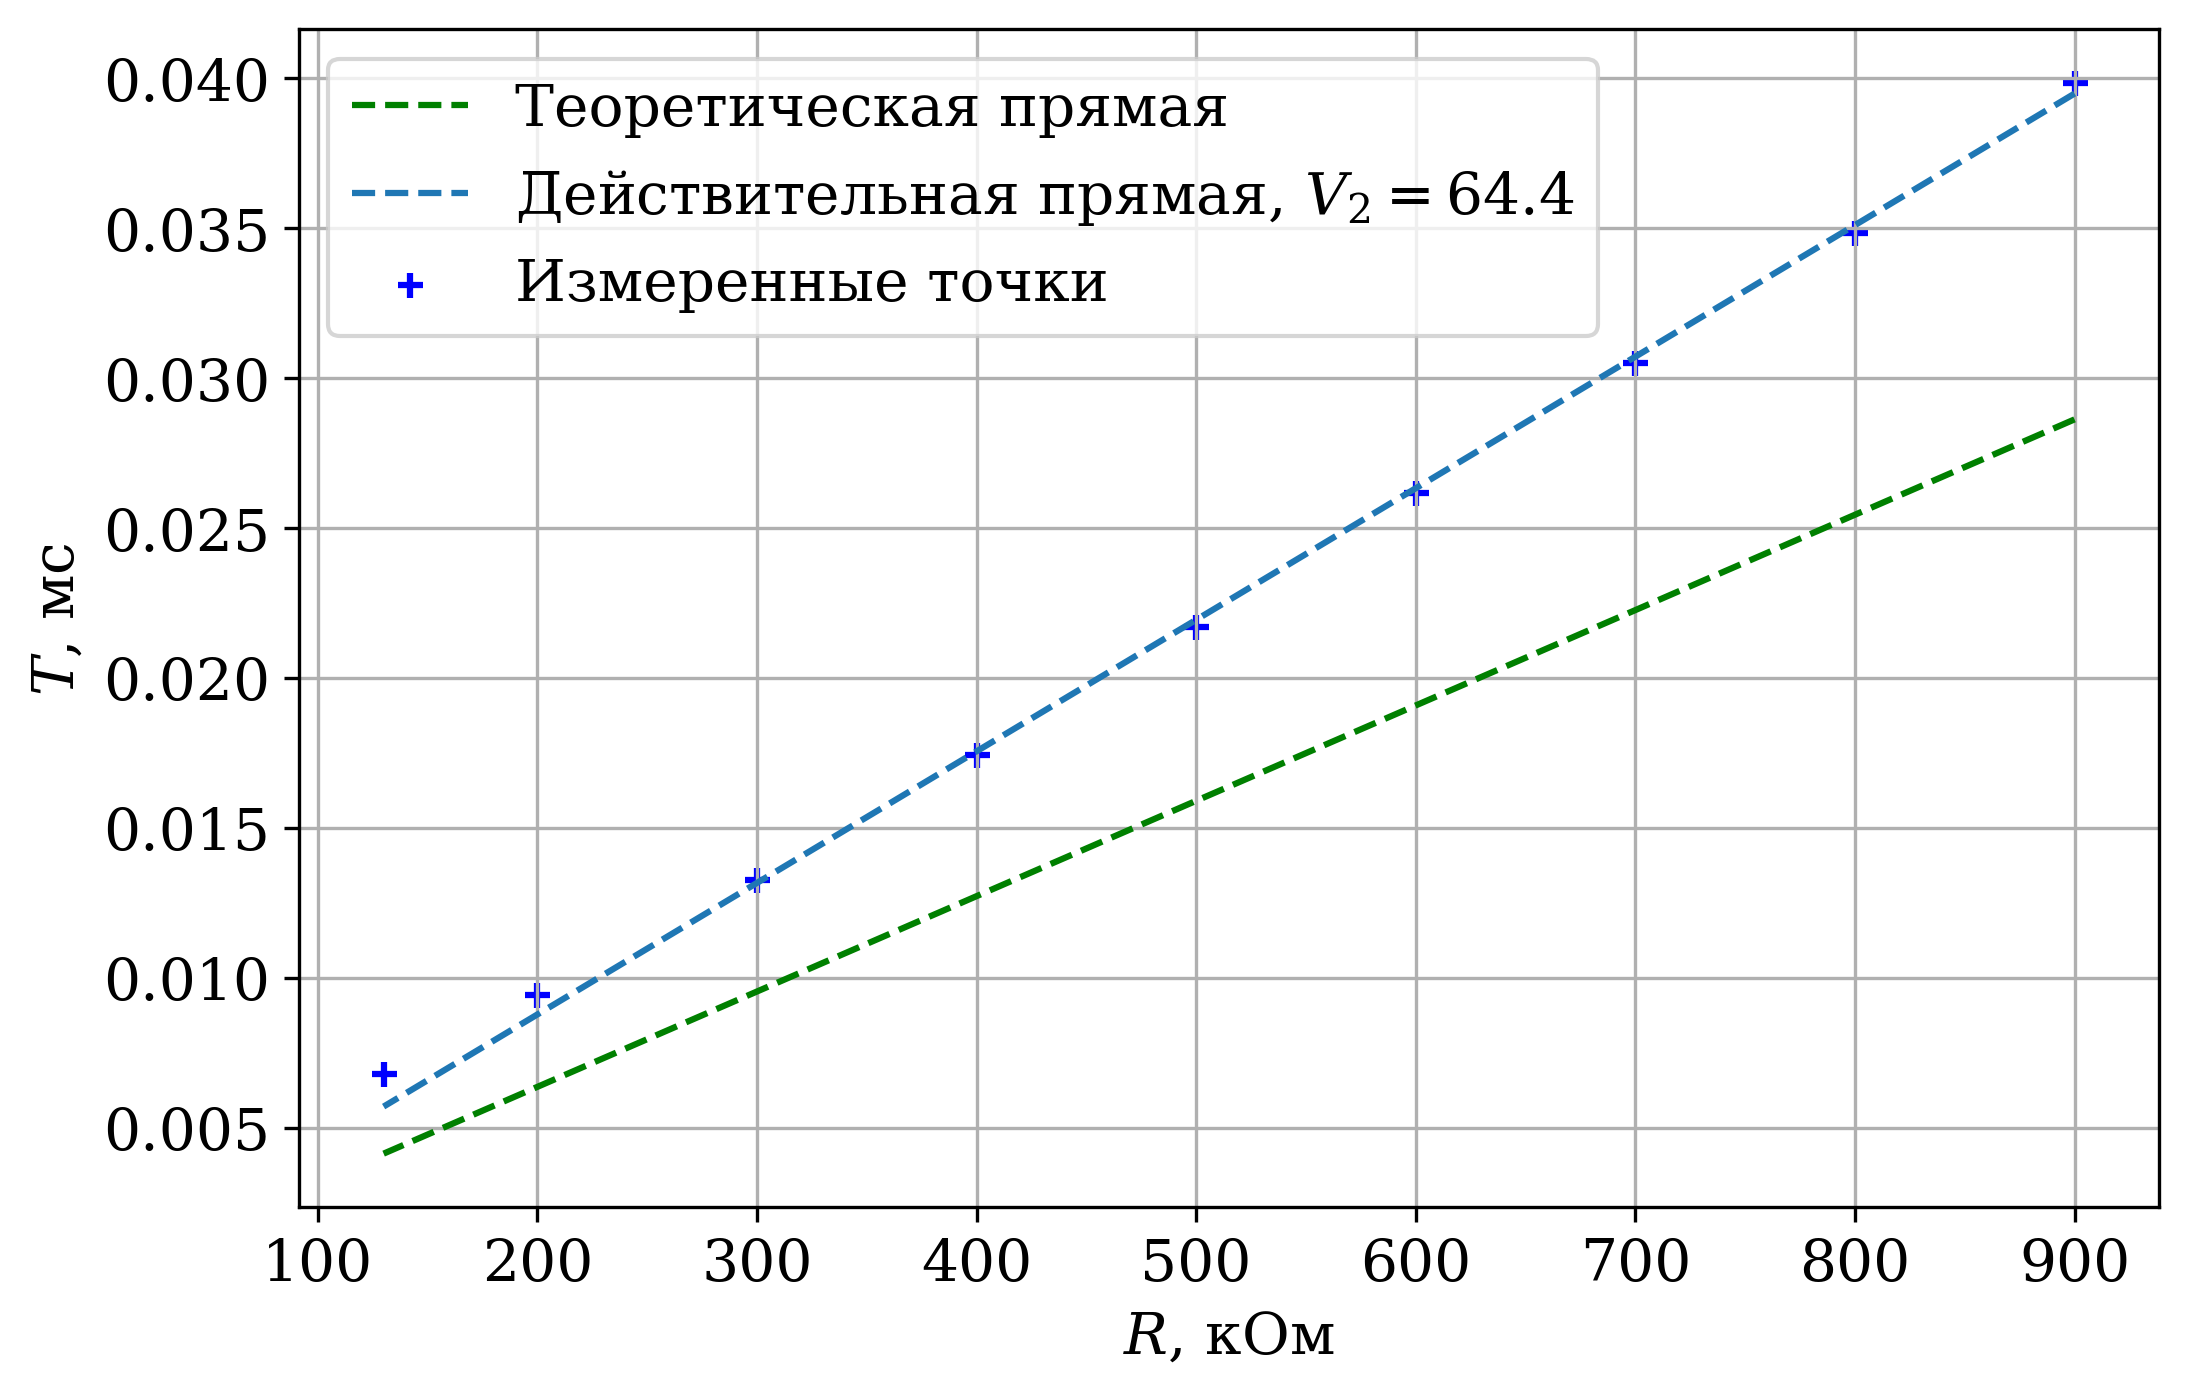

In [162]:
a, b = curve_fit(lambda x, y: T_teor(x, 0.05, 118.5, y), R_C, T_C)


plt.scatter(R_C, T_C, marker='+', color="blue", label="Измеренные точки")
# plt.scatter(C_R[0], T_R[0], marker='+', color="orange", label="Исключено из расчёта")
plt.plot(R_C, T_teor(R_C, 0.05, 118.5, V_2), color="green", ls='--', label="Теоретическая прямая")
plt.plot(R_C, T_teor(R_C, 0.05, 118.5, a[0]), ls='--', label="Действительная прямая, $V_2 = {:.1f}$".format(a[0]))

plt.xlabel("$R$, кОм")
plt.ylabel("$T$, мс")
plt.legend()

plt.savefig("plot4.png")


# plt.plot(R_C, T_C)
# plt.scatter(R_C, T_C)
# plt.plot(R_C, T_teor(R_C, 5e-2, 118.5))
b